In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [67]:
df = pd.read_csv('hotel_bookings.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [69]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [70]:
# Show the total number of nulls for each feature
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [71]:
def impute_median(series):
    return series.fillna(series.median())

In [72]:
# Fill children column with the median of the children
df.children = df['children'].transform(impute_median)

In [73]:
# Remove rows with NaN in the 'country' column from the original DataFrame
df.dropna(subset=['country'], inplace=True)

# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

In [74]:
# Replace agent and company with have and dont have
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16006
company         

In [75]:
df['agent_encoded'] = df['agent'].isnull().astype(int)

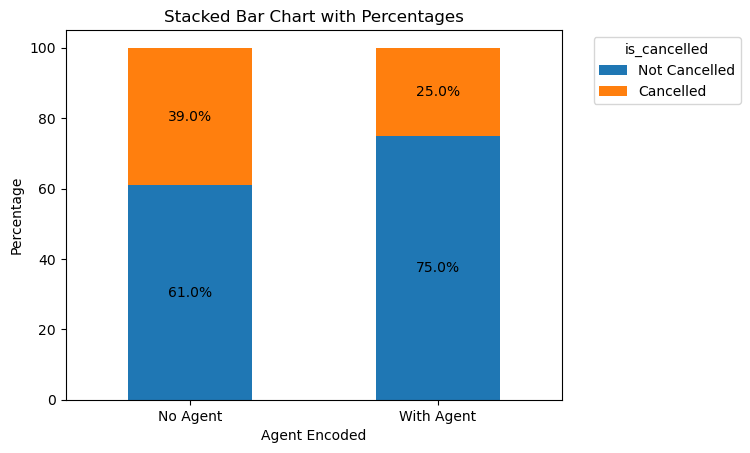

In [76]:
grouped = df.groupby(['agent_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Agent', 'With Agent']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Agent Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [77]:
df['company_encoded'] = df['company'].isnull().astype(int)

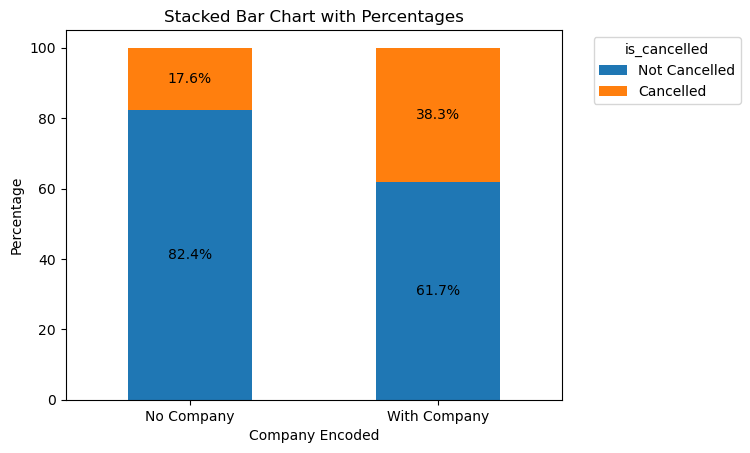

In [78]:
grouped = df.groupby(['company_encoded', 'is_canceled']).size().unstack(fill_value=0)

# Calculate percentages within each 'company_encoded' group
grouped_percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

grouped_percentages.index = ['No Company', 'With Company']

# Create a stacked bar chart with percentages
ax = grouped_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Company Encoded')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Percentages')
plt.xticks(rotation=0)
plt.legend(title='is_cancelled', labels=['Not Cancelled', 'Cancelled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate the bars with percentages
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [79]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16006
company         

In [80]:
df.skew()

/var/folders/b0/v962dph15p31189cjj58ctq00000gn/T/ipykernel_2608/1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


is_canceled                        0.532434
lead_time                          1.344451
arrival_date_year                 -0.234314
arrival_date_week_number          -0.009956
arrival_date_day_of_month         -0.002477
stays_in_weekend_nights            1.298351
stays_in_week_nights               2.697650
adults                            18.458501
children                           4.105649
babies                            24.701893
is_repeated_guest                  5.317373
previous_cancellations            24.425685
previous_bookings_not_canceled    24.037152
booking_changes                    6.005437
agent                              1.092215
company                            0.599575
days_in_waiting_list              11.919584
adr                               10.598351
required_car_parking_spaces        4.195646
total_of_special_requests          1.346640
agent_encoded                      2.141089
company_encoded                   -3.874565
dtype: float64

In [81]:
correlation_matrix = df.corr()
#correlation between is_canceled against other numeric attributes
is_cancelled_correlation = correlation_matrix['is_canceled']
sorted_correlations = is_cancelled_correlation.sort_values(ascending=False, key=abs)
sorted_correlations

/var/folders/b0/v962dph15p31189cjj58ctq00000gn/T/ipykernel_2608/3721035471.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


is_canceled                       1.000000
lead_time                         0.291940
total_of_special_requests        -0.235595
required_car_parking_spaces      -0.194801
booking_changes                  -0.144669
previous_cancellations            0.109914
agent_encoded                    -0.099457
company_encoded                   0.098028
is_repeated_guest                -0.085185
agent                            -0.081954
adults                            0.058408
previous_bookings_not_canceled   -0.055495
days_in_waiting_list              0.054008
adr                               0.046133
babies                           -0.032523
company                          -0.024385
stays_in_week_nights              0.024103
arrival_date_year                 0.016339
arrival_date_week_number          0.007481
arrival_date_day_of_month        -0.006173
children                          0.004740
stays_in_weekend_nights          -0.002639
Name: is_canceled, dtype: float64

In [82]:
from scipy.stats import chi2_contingency

# List of features (other than 'deposit_type') to test
feature_list = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type', 'reservation_status','company_encoded','agent_encoded']

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Feature', 'Chi-Squared Statistic', 'P-value'])

# Loop through the list of features and perform chi-squared tests
for feature in feature_list:
    contingency_table = pd.crosstab(df['is_canceled'], df[feature])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)

# Display the results as a table (ascending)
print(results_df)

/var/folders/b0/v962dph15p31189cjj58ctq00000gn/T/ipykernel_2608/1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
/var/folders/b0/v962dph15p31189cjj58ctq00000gn/T/ipykernel_2608/1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
/var/folders/b0/v962dph15p31189cjj58ctq00000gn/T/ipykernel_2608/1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True

                      Feature  Chi-Squared Statistic        P-value
0           arrival_date_year              76.864320   2.037629e-17
1          arrival_date_month             562.212171  1.679657e-113
2   arrival_date_day_of_month             321.887339   1.245444e-50
3    arrival_date_week_number            1096.605323  1.514505e-195
4                        meal             304.270625   1.298819e-64
5                     country           15434.681533   0.000000e+00
6              market_segment            8394.485010   0.000000e+00
7        distribution_channel            3653.712427   0.000000e+00
8          reserved_room_type             637.147604  2.215793e-131
9          assigned_room_type            4841.145584   0.000000e+00
10              customer_type            2254.871846   0.000000e+00
11               deposit_type           27548.334078   0.000000e+00
12         reservation_status          118902.000000   0.000000e+00
13            company_encoded            1141.70

/var/folders/b0/v962dph15p31189cjj58ctq00000gn/T/ipykernel_2608/1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
/var/folders/b0/v962dph15p31189cjj58ctq00000gn/T/ipykernel_2608/1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True)
/var/folders/b0/v962dph15p31189cjj58ctq00000gn/T/ipykernel_2608/1608741800.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Feature': feature, 'Chi-Squared Statistic': chi2, 'P-value': p}, ignore_index=True

In [83]:
df['arrival_date'] = df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

In [84]:
df['arrival_date_w_year'] = df['arrival_date'].astype(str) + '-' + df['arrival_date_year'].astype(str)

In [85]:
df['arrival_date_w_year'] = pd.to_datetime(df['arrival_date_w_year'], format='%B-%d-%Y')

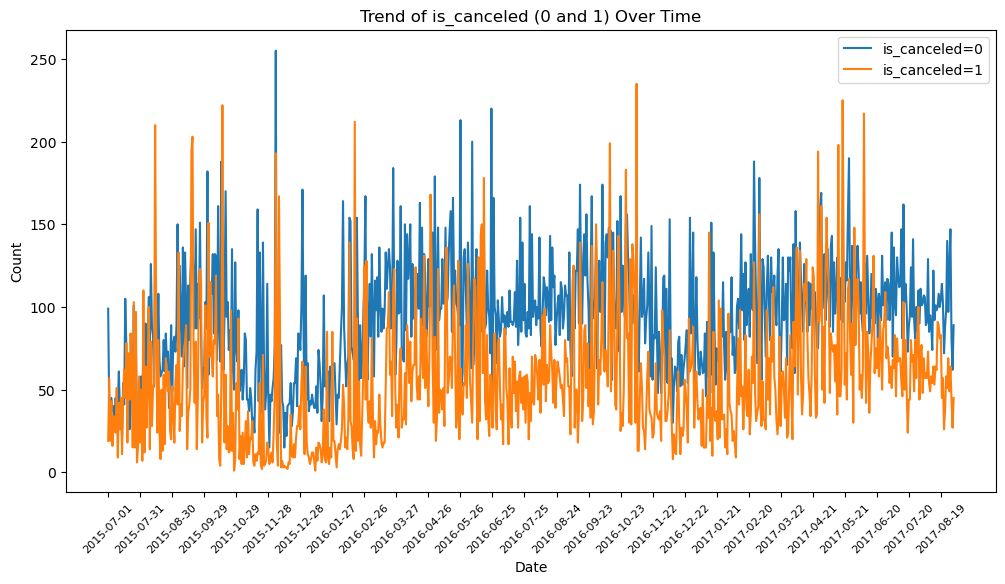

In [86]:
date_cancel_counts = df.groupby(['arrival_date_w_year', 'is_canceled']).size().unstack(fill_value=0)

# Create a new column that calculates the total counts for each date
date_cancel_counts['total'] = date_cancel_counts.sum(axis=1)

# Plot the trendlines
plt.figure(figsize=(12, 6))
plt.plot(date_cancel_counts.index, date_cancel_counts[0], label='is_canceled=0', linestyle='-')
plt.plot(date_cancel_counts.index, date_cancel_counts[1], label='is_canceled=1', linestyle='-')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Trend of is_canceled (0 and 1) Over Time')

# Show only year/month as x-axis labels for readability
plt.xticks(date_cancel_counts.index[::30], rotation=45, fontsize=8)

# Add legend
plt.legend()

# Show the plot
plt.show()

#From this graph, we can observe a trend and see that generally, the number of cancelled booking is lower than the number of non-cancelled booking.
#However, we can also observe that for certain period of time, there is a sharp increase in cancelled booking, which makes the number of cancelled booking higher than the number of non-cancelled booking.

In [87]:
dates_with_condition = []

# Iterate through the rows of date_cancel_counts
for index, row in date_cancel_counts.iterrows():
    # Check if the count for is_canceled=1 is higher than the count for is_canceled=0
    if row[1] > row[0]:
        dates_with_condition.append(index)

formatted_dates = [date.strftime('%Y-%m-%d') for date in dates_with_condition]

# Print the formatted dates
print("Dates where is_canceled=1 count is higher than is_canceled=0 count:")
print(formatted_dates)

Dates where is_canceled=1 count is higher than is_canceled=0 count:
['2015-07-02', '2015-07-09', '2015-07-13', '2015-07-16', '2015-07-18', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-25', '2015-07-27', '2015-07-30', '2015-08-03', '2015-08-13', '2015-08-14', '2015-08-27', '2015-08-30', '2015-09-05', '2015-09-10', '2015-09-17', '2015-09-18', '2015-09-24', '2015-09-26', '2015-10-03', '2015-10-05', '2015-10-16', '2015-10-17', '2015-10-24', '2015-11-13', '2015-12-08', '2015-12-09', '2016-01-22', '2016-01-27', '2016-02-17', '2016-02-21', '2016-02-26', '2016-02-28', '2016-03-25', '2016-04-14', '2016-04-19', '2016-04-24', '2016-04-28', '2016-05-13', '2016-05-24', '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-12', '2016-06-14', '2016-06-15', '2016-06-17', '2016-07-07', '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-24', '2016-09-30', '2016-10-01', '2016-10-13', '2016-10-15', '2016-10-21', '2016-10-22', '2016-10-27', '2016-10-28', '2016-11-01', '2016-11-03', '2016-11-04', '2016-1

### We consider those at p-value == 0
### Top 7 are reservation status, country, deposit type, market segment, assigned_room_type, distribution_channel, customer type, omitting reservation status

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118902 entries, 0 to 118901
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118902 non-null  object        
 1   is_canceled                     118902 non-null  int64         
 2   lead_time                       118902 non-null  int64         
 3   arrival_date_year               118902 non-null  int64         
 4   arrival_date_month              118902 non-null  object        
 5   arrival_date_week_number        118902 non-null  int64         
 6   arrival_date_day_of_month       118902 non-null  int64         
 7   stays_in_weekend_nights         118902 non-null  int64         
 8   stays_in_week_nights            118902 non-null  int64         
 9   adults                          118902 non-null  int64         
 10  children                        118902 non-null  float64

In [89]:
# Define the columns you want to select
columns_to_select = ['lead_time', 'country', 'deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type', 'agent_encoded', 'company_encoded', 'arrival_date_week_number']

# Create the new DataFrame by selecting the desired columns
final_df = df[columns_to_select]

In [90]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118902 entries, 0 to 118901
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   lead_time                 118902 non-null  int64 
 1   country                   118902 non-null  object
 2   deposit_type              118902 non-null  object
 3   market_segment            118902 non-null  object
 4   assigned_room_type        118902 non-null  object
 5   distribution_channel      118902 non-null  object
 6   customer_type             118902 non-null  object
 7   agent_encoded             118902 non-null  int64 
 8   company_encoded           118902 non-null  int64 
 9   arrival_date_week_number  118902 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 9.1+ MB


In [91]:
from sklearn.preprocessing import OneHotEncoder
# Perform one-hot encoding
transformed_df = final_df[['lead_time', 'agent_encoded', 'company_encoded']].copy()
transformed_df['arrival_date_week_number'] = df['arrival_date_week_number']
attributes_to_encode = ['country', 'deposit_type', 'market_segment', 'assigned_room_type', 'distribution_channel', 'customer_type']
for attribute in attributes_to_encode:
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoded = onehot_encoder.fit_transform(final_df[[attribute]])
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([attribute]))

    # Concatenate the one-hot encoded features with the original dataframe
    transformed_df = pd.concat([transformed_df, onehot_encoded_df], axis=1)
    print(transformed_df.shape)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_df[['lead_time', 'arrival_date_week_number']])
transformed_df[['lead_time', 'arrival_date_week_number']] = scaled_data

/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(118902, 181)
(118902, 184)
(118902, 192)


/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(118902, 204)
(118902, 209)
(118902, 213)


/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Split data into Train-Test Sets**

In [92]:
X = transformed_df
y = df['is_canceled']
print(X.shape, y.shape)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(118902, 213) (118902,)


# **Models**

# **2. Decision Tree**

a. Building Decision Tree Model

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [94]:
y_pred = clf.predict(X_test)

b. Evaluating Decision Tree Model Before Hyperparameter Tuning

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     14862
           1       0.76      0.74      0.75      8919

    accuracy                           0.81     23781
   macro avg       0.80      0.80      0.80     23781
weighted avg       0.81      0.81      0.81     23781



In [36]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision Score:", precision)
print("Recall Score:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Precision Score: 0.7593958957804934
Recall Score: 0.7385357102814217
Accuracy: 0.8141793869055128
F1 Score: 0.7488205536292842


c. Performing Hyperparameter Tuning

In [78]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_impurity_decrease': uniform(0, 0.5),
    'class_weight': [None, 'balanced'],
    'ccp_alpha': uniform(0, 0.5)
}

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=20, cv=10, random_state=0, scoring="precision")
random_search.fit(X, y)

/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classi

/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classi

/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classi

/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hannahloh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classi

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=20,
                   param_distributions={'ccp_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x175de6c90>,
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1756718d0>,
                                        'max_features': ['auto...
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17567ef50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17567ca10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x161491510>,
                                        'splitter': ['best', 'random']},
                   random_state=0, scoring='precision')

In [79]:
# Finding the best parameters, estimators, and score of the tuned model
print("Best parameters found: ", random_search.best_params_)
print("Best estimators found: ", random_search.best_estimator_)
print("Best score found: ", random_search.best_score_)

Best parameters found:  {'ccp_alpha': 0.179753950286893, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'min_impurity_decrease': 0.030112735814634917, 'min_samples_leaf': 4, 'min_samples_split': 8, 'splitter': 'random'}
Best estimators found:  DecisionTreeClassifier(ccp_alpha=0.179753950286893, criterion='entropy',
                       max_depth=2, min_impurity_decrease=0.030112735814634917,
                       min_samples_leaf=4, min_samples_split=8,
                       splitter='random')
Best score found:  0.8895356766577246


In [80]:
clf = DecisionTreeClassifier(ccp_alpha=0.179753950286893, criterion='entropy',
                       max_depth=2, min_impurity_decrease=0.030112735814634917,
                       min_samples_leaf=4, min_samples_split=8,
                       splitter='random')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision Score:", precision)
print("Recall Score:", recall)
print("Accuracy:", accuracy)

Precision Score: 0.9914908100748808
Recall Score: 0.32660612176252946
Accuracy: 0.746394180227913


d. Visualising the Decision Trees Post Hyperparameter Tuning

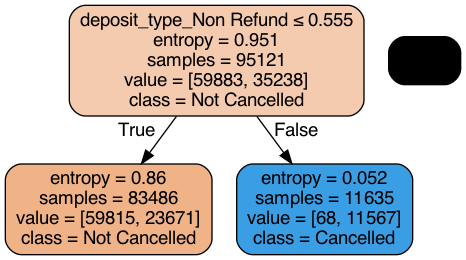

In [81]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from IPython.display import Image

feature_cols = transformed_df.columns
class_names = ['Not Cancelled', 'Cancelled']

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
                    feature_names = feature_cols,
                    filled = True, rounded = True,
                    special_characters = True,
                    class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bookingTree.png')
Image(graph.create_png())

d. Evaluating the Model Post Hyperparameter Tuning

In [90]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83     14862
           1       0.99      0.33      0.49      8919

    accuracy                           0.75     23781
   macro avg       0.85      0.66      0.66     23781
weighted avg       0.82      0.75      0.70     23781



Building Random Forest Model

# **4. XGBoost (Extreme Gradient Boosting)**

# **5. Feedforward Neural Network**

# **6. Support Vector Machine (SVM)**